# Snapshots
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 04/20/2022          |
| Updated | 02/15/2024          |

## **Figure 2.**

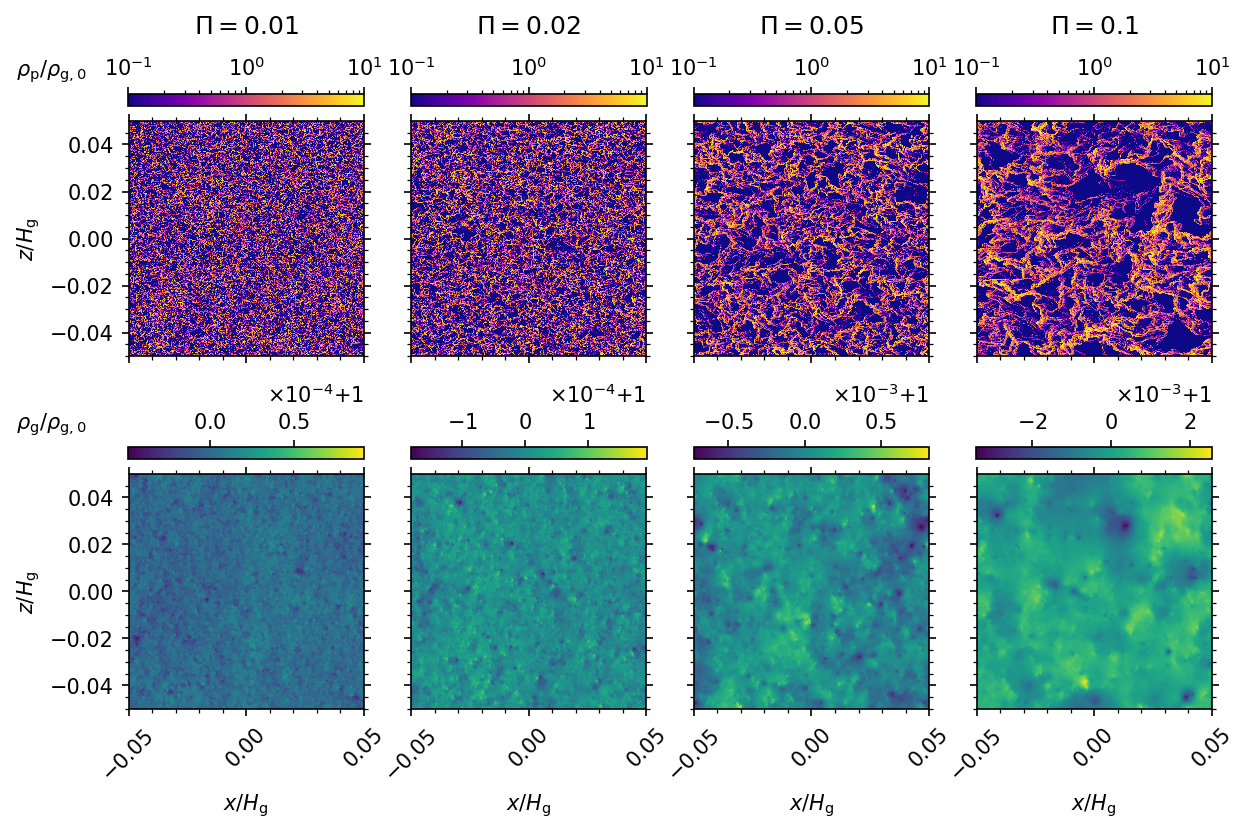

In [1]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np

mpl.rcParams["axes.formatter.offset_threshold"] = 2
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(9.32, 5.6),
                        dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = 2048
vmin_p, vmax_p = 1e-1, 1e1 # AB CPDD > 85%; CPDD < 5%

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    rhops = axs[0][i].pcolormesh(xv, zv, clip, norm=colors.LogNorm(),
                                 cmap='plasma')
    rhogs = axs[1][i].pcolormesh(xv, zv, data['rho'][0])

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'$\Pi={float(Pi)}$', pad=42)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 1))
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top',
                           format=formatter)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.48, 1.27, r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.48, 1.27, r'$\rho_\mathrm{g}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
plt.savefig(f'figs/png/{case}_snaps.png', dpi=1200, bbox_inches='tight',
            pad_inches=0.01)
plt.show()

## **Figure 3.**

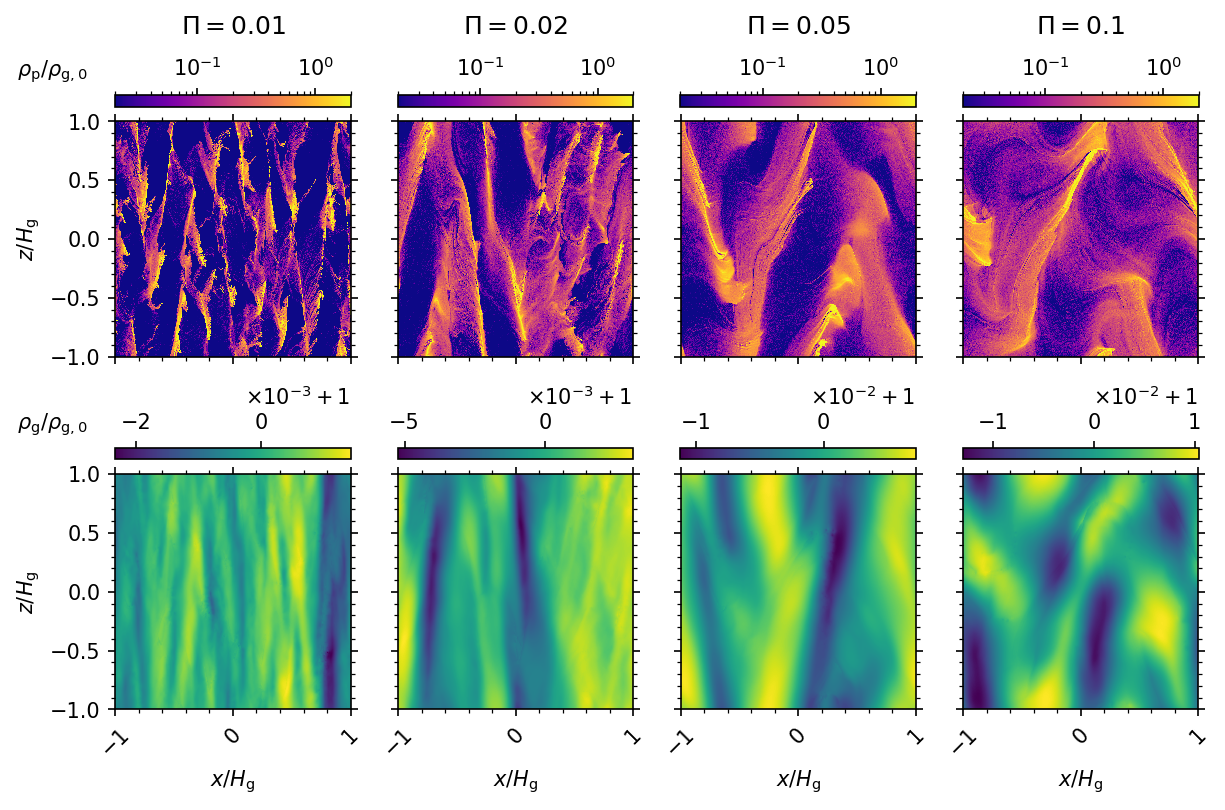

In [2]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(9.32, 5.6),
                        dpi=150)
workdir = '../unstrat'
case = 'BA'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = 2048
vmin_p, vmax_p = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00200.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    # print(f'Π = {Pi}')
    # denom = np.sum(data['rhop'][0]**2)
    # print(f'\tLxLyLz<ρ_p^2> = {denom:.1f} Hg^3 ρ_g,0^2')
    # denom = np.sum(data['rho'][0]**2)
    # print(f'\tLxLyLz<ρ_g^2> = {denom:.1f} Hg^3 ρ_g,0^2')
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    rhops = axs[0][i].pcolormesh(xv, zv, clip, norm=colors.LogNorm(),
                                 cmap='plasma')
    if float(Pi) < 0.05: offset = (data['rho'][0] - 1)*1e3
    else: offset = (data['rho'][0] - 1)*1e2
    rhogs = axs[1][i].pcolormesh(xv, zv, offset)

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'$\Pi={float(Pi)}$', pad=42)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    if float(Pi) < 0.05:
        axs[1][i].text(0.55, 1.38, r'$\times10^{-3}+1$', ha='left',
                       va='top', transform=axs[1][i].transAxes)
    else:
        axs[1][i].text(0.55, 1.38, r'$\times10^{-2}+1$', ha='left',
                       va='top', transform=axs[1][i].transAxes)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.42, 1.27, r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.42, 1.27, r'$\rho_\mathrm{g}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
plt.savefig(f'figs/png/{case}_snaps.png', dpi=1200, bbox_inches='tight',
            pad_inches=0.01)
plt.show()

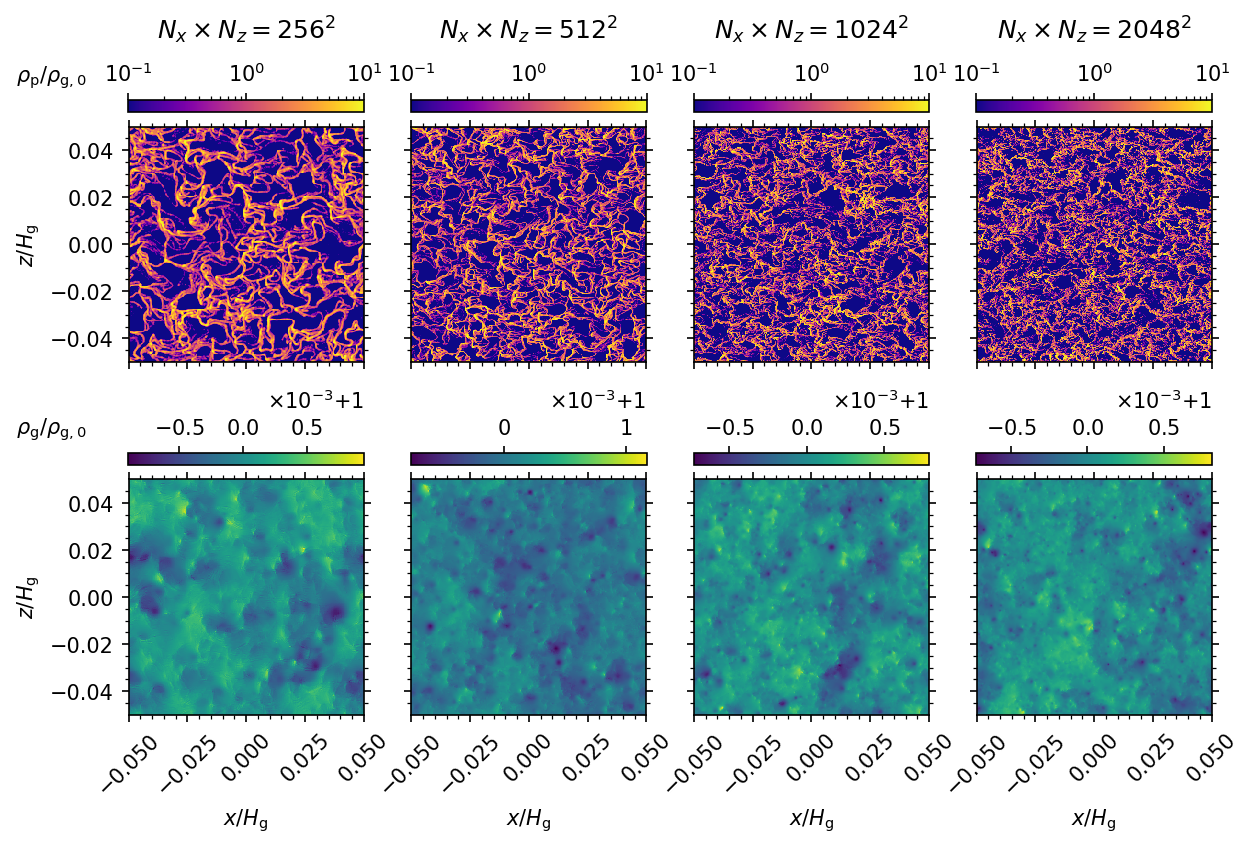

In [2]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np

mpl.rcParams["axes.formatter.offset_threshold"] = 2
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(9.32, 5.6),
                        dpi=150)
workdir = '../unstrat'
case = 'AB'
Pi = '0.05'
reses = ['256', '512', '1024', '2048']
vmin_p, vmax_p = 1e-1, 1e1 # AB CPDD > 85%; CPDD < 5%

for i, res in enumerate(reses):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    rhops = axs[0][i].pcolormesh(xv, zv, clip, norm=colors.LogNorm(),
                                 cmap='plasma')
    rhogs = axs[1][i].pcolormesh(xv, zv, data['rho'][0])

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(rf'$N_x \times N_z = {res}^2$', pad=42)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 1))
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top',
                           format=formatter)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.48, 1.27, r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.48, 1.27, r'$\rho_\mathrm{g}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
# plt.savefig(f'figs/png/{case}_snaps.png', dpi=1200, bbox_inches='tight',
#             pad_inches=0.01)
plt.show()

In [66]:
data = np.load('npz/SI.out.00001.npz')
data

NpzFile 'npz/SI.out.00001.npz' with keys: Time, rho, vel1, vel2, vel3

In [67]:
data['Time']

array(0.10002373)

In [55]:
data

{'Coordinates': b'cartesian',
 'DatasetNames': array([b'prim'], dtype='|S21'),
 'MaxLevel': 0,
 'MeshBlockSize': array([32, 32,  1], dtype='>i4'),
 'NumCycles': 3357795,
 'NumMeshBlocks': 4096,
 'NumVariables': array([8], dtype='>i4'),
 'RootGridSize': array([2048, 2048,    1], dtype='>i4'),
 'RootGridX1': array([-0.05,  0.05,  1.  ]),
 'RootGridX2': array([-0.05,  0.05,  1.  ]),
 'RootGridX3': array([-0.05,  0.05,  1.  ]),
 'Time': 10.0,
 'VariableNames': array([b'rho', b'vel1', b'vel2', b'vel3', b'vp1', b'vp2', b'vp3', b'rhop'],
       dtype='|S21'),
 'x1f': array([-0.05      , -0.04995117, -0.04990234, ...,  0.04990234,
         0.04995117,  0.05      ]),
 'x1v': array([-0.04997559, -0.04992676, -0.04987793, ...,  0.04987793,
         0.04992676,  0.04997559]),
 'x2f': array([-0.05      , -0.04995117, -0.04990234, ...,  0.04990234,
         0.04995117,  0.05      ]),
 'x2v': array([-0.04997559, -0.04992676, -0.04987793, ...,  0.04987793,
         0.04992676,  0.04997559]),
 'x3f': a